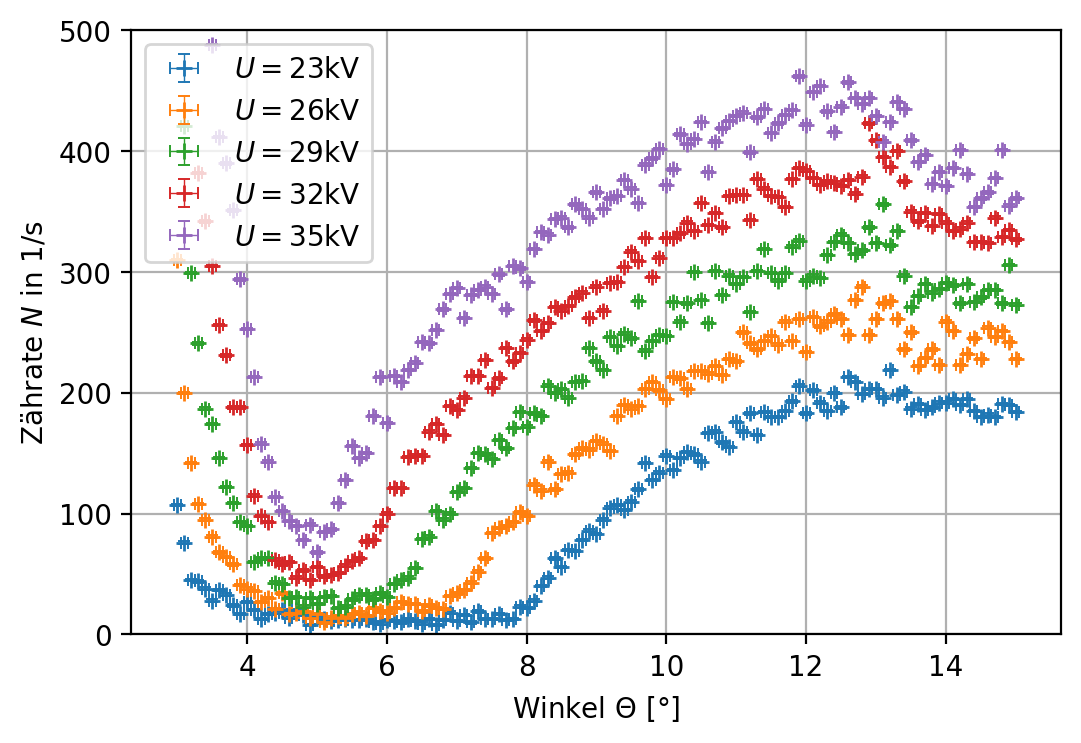

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Nerr = 1
Thetaerr = 0.05
U = np.array([23,26,29,32,35])*1000

##Messung mit Cu Anode

##Plot zwischen 0 und 14°
theta1 = np.loadtxt("Messung3-1_23kV.txt",usecols = 0) 
theta2 = np.loadtxt("Messung3-1_26kV.txt",usecols = 0) 
theta3 = np.loadtxt("Messung3-1_29kV.txt",usecols = 0)
theta4 = np.loadtxt("Messung3-1_32kV.txt",usecols = 0)
theta5 = np.loadtxt("Messung3-1_35kV.txt",usecols = 0) 

N1 = np.loadtxt("Messung3-1_23kV.txt",usecols = 1)
N2 = np.loadtxt("Messung3-1_26kV.txt",usecols = 1)
N3 = np.loadtxt("Messung3-1_29kV.txt",usecols = 1)
N4 = np.loadtxt("Messung3-1_32kV.txt",usecols = 1)
N5 = np.loadtxt("Messung3-1_35kV.txt",usecols = 1)


plt.figure(dpi = 200) #erstellen einer neuen Abbildung
#plt.title("Messung für verschiedene Anodenspannungen")
plt.xlabel("Winkel $\Theta$ [°]") 
plt.ylabel("Zährate $N$ in 1/s") 
plt.grid()
plt.ylim(0,500)
plt.errorbar(theta1, N1, xerr = Thetaerr ,yerr=Nerr, marker='+', ls='', capsize=2, capthick=0.7, lw=0.5, label="$U=23$kV")
plt.errorbar(theta2, N2, xerr = Thetaerr ,yerr=Nerr, marker='+', ls='', capsize=2, capthick=0.7, lw=0.5, label="$U=26$kV")
plt.errorbar(theta3, N3, xerr = Thetaerr ,yerr=Nerr, marker='+', ls='', capsize=2, capthick=0.7, lw=0.5, label="$U=29$kV")
plt.errorbar(theta4, N4, xerr = Thetaerr ,yerr=Nerr, marker='+', ls='', capsize=2, capthick=0.7, lw=0.5, label="$U=32$kV")
plt.errorbar(theta5, N5, xerr = Thetaerr ,yerr=Nerr, marker='+', ls='', capsize=2, capthick=0.7, lw=0.5, label="$U=35$kV")
plt.legend(loc = "upper left")
plt.savefig("uvar.pdf")


In [4]:
##Bestimmen der Grenzwellenlänge
d = 201*1e-12
e = 1.6e-19
c = 3e8
theta = np.radians(2*np.array([3.8,3.4,2.7,2.5,2.5]))
thetaerr = np.radians(np.array([0.2,0.3,0.3,0.3,0.3]))


lam = 2*d*np.sin(theta)
lamerr = thetaerr * 2 * d * np.cos(theta)
h = e * U * lam / c
herr = lamerr * e * U /c
print(h)
print(herr)


[6.52182712e-34 6.60031081e-34 5.85127849e-34 5.97958120e-34
 6.54016694e-34]
[1.70619271e-35 2.89821710e-35 3.24107960e-35 3.57863667e-35
 3.91413386e-35]


In [11]:
import numpy as np
import matplotlib.pyplot as plt

Nerr = 1
Thetaerr = 0.05
U = np.array([23,26,29,32,35])*1000

##Messung mit Cu Anode

##plot zwischen 17 und 24°
theta1 = np.loadtxt("Messung3-2_23kV.txt",usecols = 0) 
theta2 = np.loadtxt("Messung3-2_26kV.txt",usecols = 0) 
theta3 = np.loadtxt("Messung3-2_29kV.txt",usecols = 0)
theta4 = np.loadtxt("Messung3-2_32kV.txt",usecols = 0)
theta5 = np.loadtxt("Messung3-2_35kV.txt",usecols = 0) 


N1 = np.loadtxt("Messung3-2_23kV.txt",usecols = 1)
N2 = np.loadtxt("Messung3-2_26kV.txt",usecols = 1)
N3 = np.loadtxt("Messung3-2_29kV.txt",usecols = 1)
N4 = np.loadtxt("Messung3-2_32kV.txt",usecols = 1)
N5 = np.loadtxt("Messung3-2_35kV.txt",usecols = 1)



plt.figure(dpi = 200) #erstellen einer neuen Abbildung
#plt.title("Messung im Bereich 17° bis 24°")
plt.xlabel("Winkel $\Theta$ [°]") 
plt.ylabel("Zährate $N$ in 1/s") 
plt.grid()
plt.errorbar(theta1, N1, xerr = Thetaerr ,yerr=Nerr, marker='+', ls='', capsize=2, capthick=0.7, lw=0.5, label="$U=23$kV")
plt.errorbar(theta2, N2, xerr = Thetaerr ,yerr=Nerr, marker='+', ls='', capsize=2, capthick=0.7, lw=0.5, label="$U=26$kV")
plt.errorbar(theta3, N3, xerr = Thetaerr ,yerr=Nerr, marker='+', ls='', capsize=2, capthick=0.7, lw=0.5, label="$U=29$kV")
plt.errorbar(theta4, N4, xerr = Thetaerr ,yerr=Nerr, marker='+', ls='', capsize=2, capthick=0.7, lw=0.5, label="$U=32$kV")
plt.errorbar(theta5, N5, xerr = Thetaerr ,yerr=Nerr, marker='+', ls='', capsize=2, capthick=0.7, lw=0.5, label="$U=35$kV")
plt.legend(loc = "upper left")
plt.savefig("uvar1.pdf")


In [9]:
import scipy.optimize as opt

def func(x,a,b):
    return a * (x - b) ** (3/2)

###Berechnung der Intensität der charakteristischen Linien
Nerr = 50
U = np.array([23,26,29,32,35])*1000
x = np.linspace(np.min(U),np.max(U),1000)
##kbeta linie
N1 = np.array([2300,3000,3600,4250,4900])

##kalpha linie
N2 = np.array([9800,11100,12100,12800,13200])

p1, pcov1 = opt.curve_fit(func, U, N1, p0=[0,0])
p2, pcov2 = opt.curve_fit(func, U, N2, p0=[0,0])
p1err = np.sqrt(np.diag(pcov1))
p2err = np.sqrt(np.diag(pcov2))


##plot der intensitäten
plt.figure(dpi = 200) #erstellen einer neuen Abbildung
#plt.title("Intensität der charakteristischen Linien")
plt.xlabel("Anodenspannung $U$") 
plt.ylabel("Zährate $N$ in 1/s") 
plt.grid()
plt.errorbar(U, N1,yerr=Nerr, marker='+', ls='', capsize=2, capthick=0.7, lw=0.5, label=r'$K_\beta$',color = 'g')
plt.errorbar(U, N2,yerr=Nerr, marker='+', ls='', capsize=2, capthick=0.7, lw=0.5, label=r'$K_\alpha$',color= 'b')
plt.plot(x,func(x,p1[0],p1[1]),lw = 0.7,color = 'g')
plt.plot(x,func(x,p2[0],p2[1]),lw = 0.7,color = 'b')
#plt.plot(x,func(x,75e-5,-34000),lw = 0.7,color = 'b')
plt.legend(loc = "upper left")
plt.savefig("charintens.pdf")

print(p1,p2)
print(p1err,p2err)

[9.06587264e-04 4.05631373e+03] [ 7.49563880e-04 -3.37425432e+04]
[3.73697719e-05 7.14583736e+02] [1.45941686e-04 8.19973542e+03]


In [5]:
###Absorpionskoeffizienten
d = 201*1e-12 ###immer noch gitterkonstante
Nerr = 1
Thetaerr = 0.05 ##in grad

#dichten
rho_al = 270
rho_cu = 892
rho_ni = 890
rho_zn = 714
rho_sn = 728

#dicke
d1 = 0.025e-3

theta = np.loadtxt("Messung5_Al.txt",usecols = 0)
al = np.loadtxt("Messung5_Al.txt",usecols = 1)
ni = np.loadtxt("Messung5_Ni.txt",usecols = 1)
ohne = np.loadtxt("Messung5_ohne.txt",usecols = 1)
sn = np.loadtxt("Messung5_Sn.txt",usecols = 1)
zn = np.loadtxt("Messung5_Zn.txt",usecols = 1)



plt.figure(dpi = 200) #erstellen einer neuen Abbildung
#plt.title("Messung mit Absorbern")
plt.xlabel("Winkel $\Theta$ [°]") 
plt.ylabel("Zährate $N$ in 1/s") 
plt.grid()
plt.errorbar(theta, al, xerr = Thetaerr ,yerr=Nerr, marker='+', ls='', capsize=2, capthick=0.7, lw=0.5, label="Al")
plt.errorbar(theta, ni, xerr = Thetaerr ,yerr=Nerr, marker='+', ls='', capsize=2, capthick=0.7, lw=0.5, label="Ni")
plt.errorbar(theta, ohne, xerr = Thetaerr ,yerr=Nerr, marker='+', ls='', capsize=2, capthick=0.7, lw=0.5, label="kein Absorber")
plt.errorbar(theta, sn, xerr = Thetaerr ,yerr=Nerr, marker='+', ls='', capsize=2, capthick=0.7, lw=0.5, label="Sn")
plt.errorbar(theta, zn, xerr = Thetaerr ,yerr=Nerr, marker='+', ls='', capsize=2, capthick=0.7, lw=0.5, label="Zn")

plt.legend(loc = "upper left")
plt.savefig("absorber.pdf")


##Berechnen der koeffizienten durch die jeweilige dichte
mu_al = -1 / d1 * np.log(al/ohne) / rho_al
mu_alerr = Nerr / d1 * np.sqrt(1/ al**2 + 1 / ohne**2) / rho_al
mu_ni =  -1 / d1 * np.log(ni/ohne) / rho_ni
mu_nierr = Nerr / d1 * np.sqrt(1/ ni**2 + 1 / ohne**2) / rho_ni
mu_sn =  -1 / d1 * np.log(sn/ohne) / rho_sn
mu_snerr = Nerr / d1 * np.sqrt(1/ sn**2 + 1 / ohne**2) / rho_sn
mu_zn =  -1 / d1 * np.log(zn/ohne) / rho_zn
mu_znerr = Nerr / d1 * np.sqrt(1/ zn**2 + 1 / ohne**2)/ rho_zn
print(mu_al)
print(mu_alerr)




[22.54693561 19.17897292 19.31286191 26.59386895 27.13782141 35.25313142
 45.09814825 51.08747945 63.45917066]
[2.67513377 1.60327942 1.24763155 1.08465444 0.99370024 0.93849909
 1.12935589 1.18659253 1.22793198]


[8.32449252e+31 1.87896418e+01] [3.95055463e+30 3.02167669e+00]


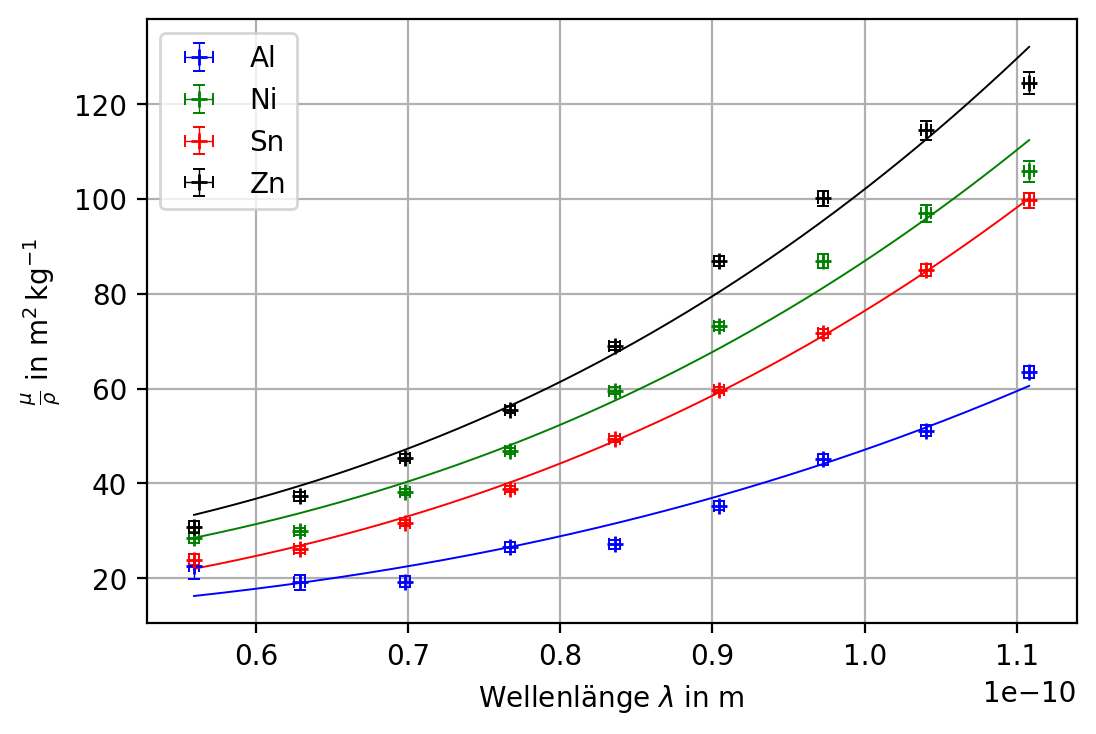

In [6]:
###plot der Absorptionskoeffizienten

##wellenlängen
lam = 2*d*np.sin(np.radians(theta))
lamerr = np.radians(Thetaerr) * 2 * d * np.cos(np.radians(theta))
x = np.linspace(np.min(lam),np.max(lam),1000)
#fit

def func(x,a,c):
    return(a*x**3+c)


p1, pcov1 = opt.curve_fit(func, lam, mu_al, p0=[1e29,0])
p2, pcov2 = opt.curve_fit(func, lam, mu_ni, p0=[1e29,0])
p3, pcov3 = opt.curve_fit(func, lam, mu_sn, p0=[1e29,0])
p4, pcov4 = opt.curve_fit(func, lam, mu_zn, p0=[1e29,0])
p1err = np.sqrt(np.diag(pcov1))
p2err = np.sqrt(np.diag(pcov2))
p3err = np.sqrt(np.diag(pcov3))
p4err = np.sqrt(np.diag(pcov4))


plt.figure(dpi = 200) #erstellen einer neuen Abbildung
#plt.title("Absorptionskoeffizienten in Abhängigkeit der Wellenlänge")
plt.xlabel("Wellenlänge $\lambda$ in m") 
plt.ylabel(r'$\frac{\mu}{\rho}$ in $\mathrm{m}^2\,\mathrm{kg}^{-1}$') 
plt.grid()
plt.errorbar(lam, mu_al, xerr = lamerr ,yerr=mu_alerr, marker='+', ls='', capsize=2, capthick=0.7, lw=0.5, label="Al",color = 'b')
plt.errorbar(lam, mu_ni, xerr = lamerr ,yerr=mu_nierr, marker='+', ls='', capsize=2, capthick=0.7, lw=0.5, label="Ni",color = 'g')
plt.errorbar(lam, mu_sn, xerr = lamerr ,yerr=mu_snerr, marker='+', ls='', capsize=2, capthick=0.7, lw=0.5, label="Sn",color = 'r')
plt.errorbar(lam, mu_zn, xerr = lamerr ,yerr=mu_znerr, marker='+', ls='', capsize=2, capthick=0.7, lw=0.5, label="Zn",color = 'k')
plt.plot(x,func(x,p1[0],p1[1]),lw = 0.7,color = 'b')
plt.plot(x,func(x,p2[0],p2[1]),lw = 0.7,color = 'g')
plt.plot(x,func(x,p3[0],p3[1]),lw = 0.7,color = 'r')
plt.plot(x,func(x,p4[0],p4[1]),lw = 0.7,color = 'k')
plt.legend(loc = "upper left")
plt.savefig("absorbcoeff.pdf")

print(p4,p4err)